# Outlier Detection

# 3 - Algorithmic Methods

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
np.random.seed(0)

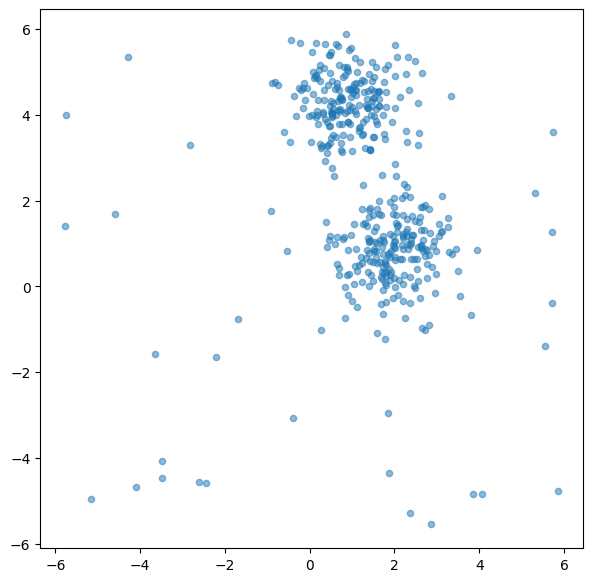

In [5]:
# Create toy data: 2 clusters and some additional random data
n_samples = 400
n_noise_samples = 40

clusters = make_blobs(n_samples=n_samples, centers=2, cluster_std=0.70, random_state=0)
random_data = np.random.uniform(low=-6, high=6, size=(n_noise_samples, 2))
X = np.vstack([clusters[0], random_data])

fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0], X[:, 1], alpha=0.5, s=20)
plt.show()

## Method: Local Outlier Factor (LOF)

In [13]:
from sklearn.neighbors import LocalOutlierFactor

# Create the model
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.1,
    metric_params=None,
    n_jobs=-1)

# Fit the model and classify outliers
outlier_classification = lof.fit_predict(X)

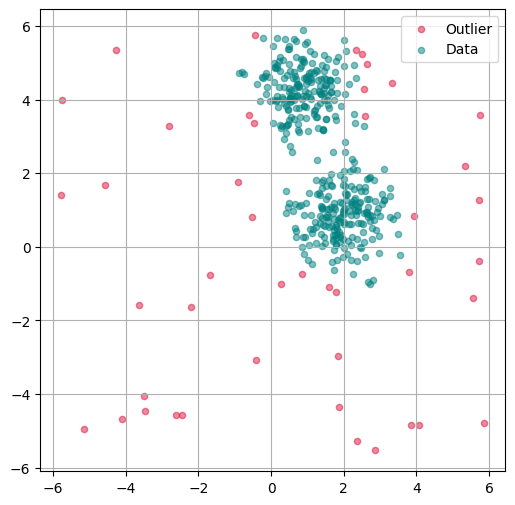

In [14]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(6, 6))

# Scatter Plot: Outlier
mask = outlier_classification == -1
scatter = ax.scatter(X[mask, 0], X[mask, 1],
                     c="crimson",
                     alpha=0.5,
                     label="Outlier",
                     s=20)

# Data
scatter = ax.scatter(X[~mask, 0], X[~mask, 1],
                     c="teal",
                     alpha=0.5,
                     label="Data",
                     s=20)
plt.grid(True)
plt.legend()
plt.show()


In [17]:
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.1,
    novelty=True,  # this has to be set to True to later get anomaly ratings
    n_jobs=-1)

lof.fit(X)

# Predict degree of anomaly
anomaly_prediction = lof.decision_function(X)

<ipython-input-22-030403342881>:8: UserWarning: Adding colorbar to a different Figure <Figure size 600x600 with 1 Axes> than <Figure size 600x600 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scatter, ax=ax)


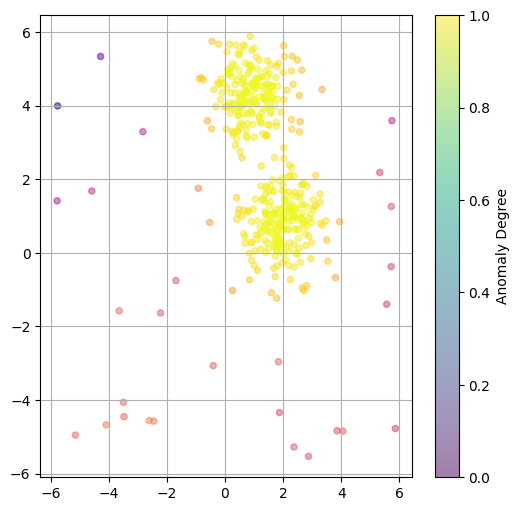

In [22]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1],
           c=anomaly_prediction, cmap="plasma",
           alpha=0.5,
           s=20)

# Adding a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Anomaly Degree')
plt.grid(True)
plt.show()

In [23]:
outlier_classifications = []
anomaly_degrees = []

for contamination in [0.01, 0.1, 0.2, 0.4]:
    lof = LocalOutlierFactor(
        n_neighbors=20,
        contamination=contamination,
        novelty=True,
        n_jobs=-1)

    # Fit the model
    lof.fit(X)

    # Classify as outlier / no outlier
    outlier_classifications.append(lof.predict(X))
    anomaly_degrees.append(lof.decision_function(X))

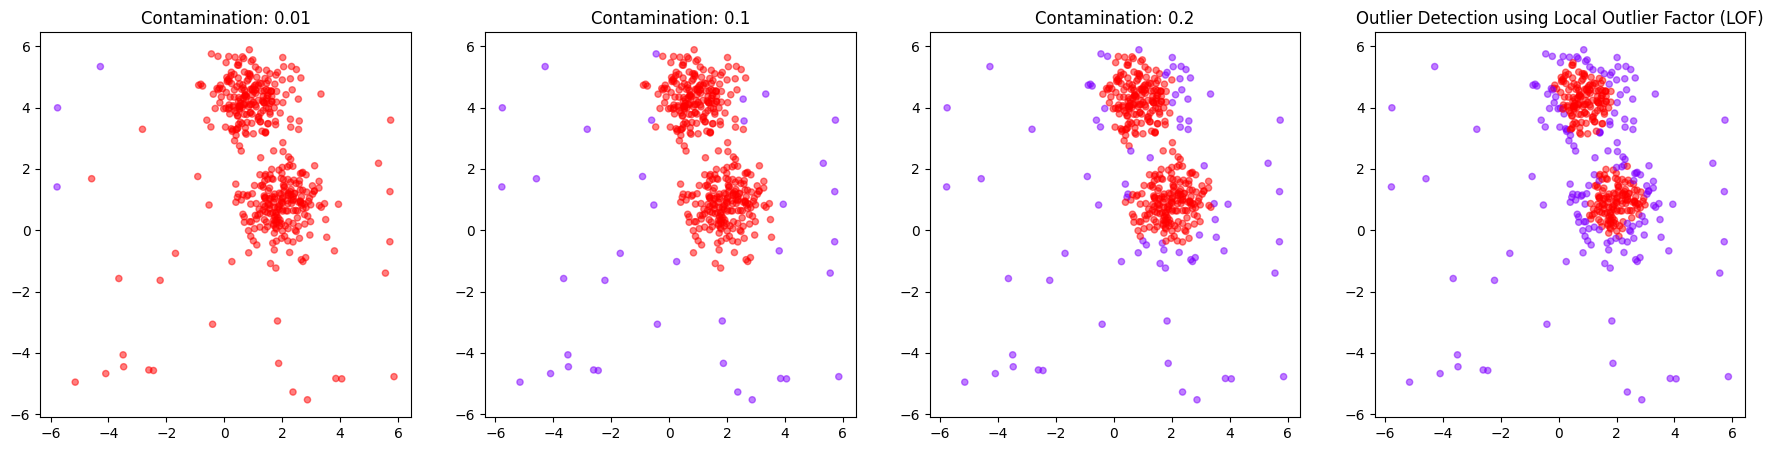

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(22, 5))

for i, contamination in enumerate([0.01, 0.1, 0.2, 0.4]):
    axes[i].scatter(
        X[:, 0], X[:, 1],
        c=outlier_classifications[i], cmap="rainbow",
        alpha=0.5,
        s=20)
    axes[i].set_title(f"Contamination: {contamination}")
plt.title("Outlier Detection using Local Outlier Factor (LOF)")
plt.show()

## Isolation Forest

In [27]:
from sklearn.ensemble import IsolationForest

# Create the model
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.075,
    n_jobs=-1,
    random_state=42,
    verbose=0)

# Fit the model
iso_forest.fit(X)

# Classify as outlier / no outlier
outlier_classification = iso_forest.predict(X)

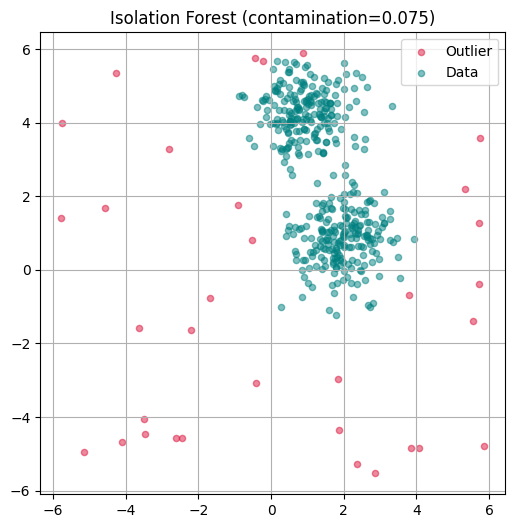

In [37]:
fig, ax = plt.subplots(figsize=(6, 6))

# Scatter Plot: Outlier
mask = outlier_classification == -1
scatter = ax.scatter(X[mask, 0], X[mask, 1],
                     c="crimson",
                     alpha=0.5,
                     label="Outlier",
                     s=20)

# Data
scatter = ax.scatter(X[~mask, 0], X[~mask, 1],
                     c="teal",
                     alpha=0.5,
                     label="Data",
                     s=20)
plt.title("Isolation Forest (contamination=0.075)")
plt.grid(True)
plt.legend()
plt.show()

In [29]:
# Predict degree of anomaly
scores_pred = iso_forest.decision_function(X)

<ipython-input-30-b61d4c7e0ffa>:8: UserWarning: Adding colorbar to a different Figure <Figure size 600x600 with 1 Axes> than <Figure size 600x600 with 2 Axes> which fig.colorbar is called on.
  cbar = plt.colorbar(scatter, ax=ax)


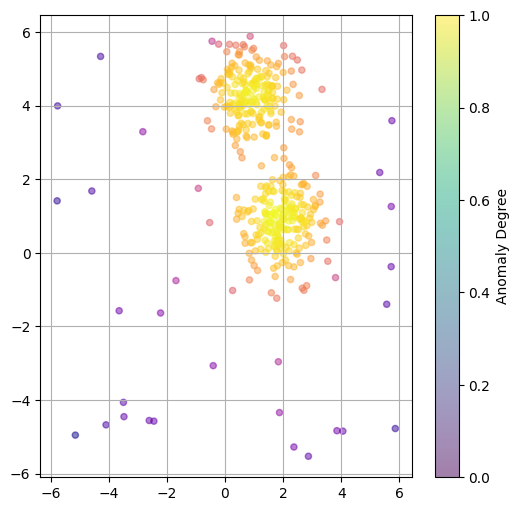

In [30]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:, 0], X[:, 1],
           c=scores_pred, cmap="plasma",
           alpha=0.5,
           s=20)

# Adding a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Anomaly Degree')
plt.grid(True)
plt.show()

In [31]:
outlier_classifications = []
anomaly_degrees = []

for contamination in [0.01, 0.1, 0.2, 0.4]:

    # Create the model
    iso_forest = IsolationForest(
        n_estimators=100,
        contamination=contamination,
        n_jobs=-1,
        random_state=42)

    # Fit the model
    iso_forest.fit(X)

    # Classify as outlier / no outlier
    outlier_classifications.append(iso_forest.predict(X))
    anomaly_degrees.append(iso_forest.decision_function(X))

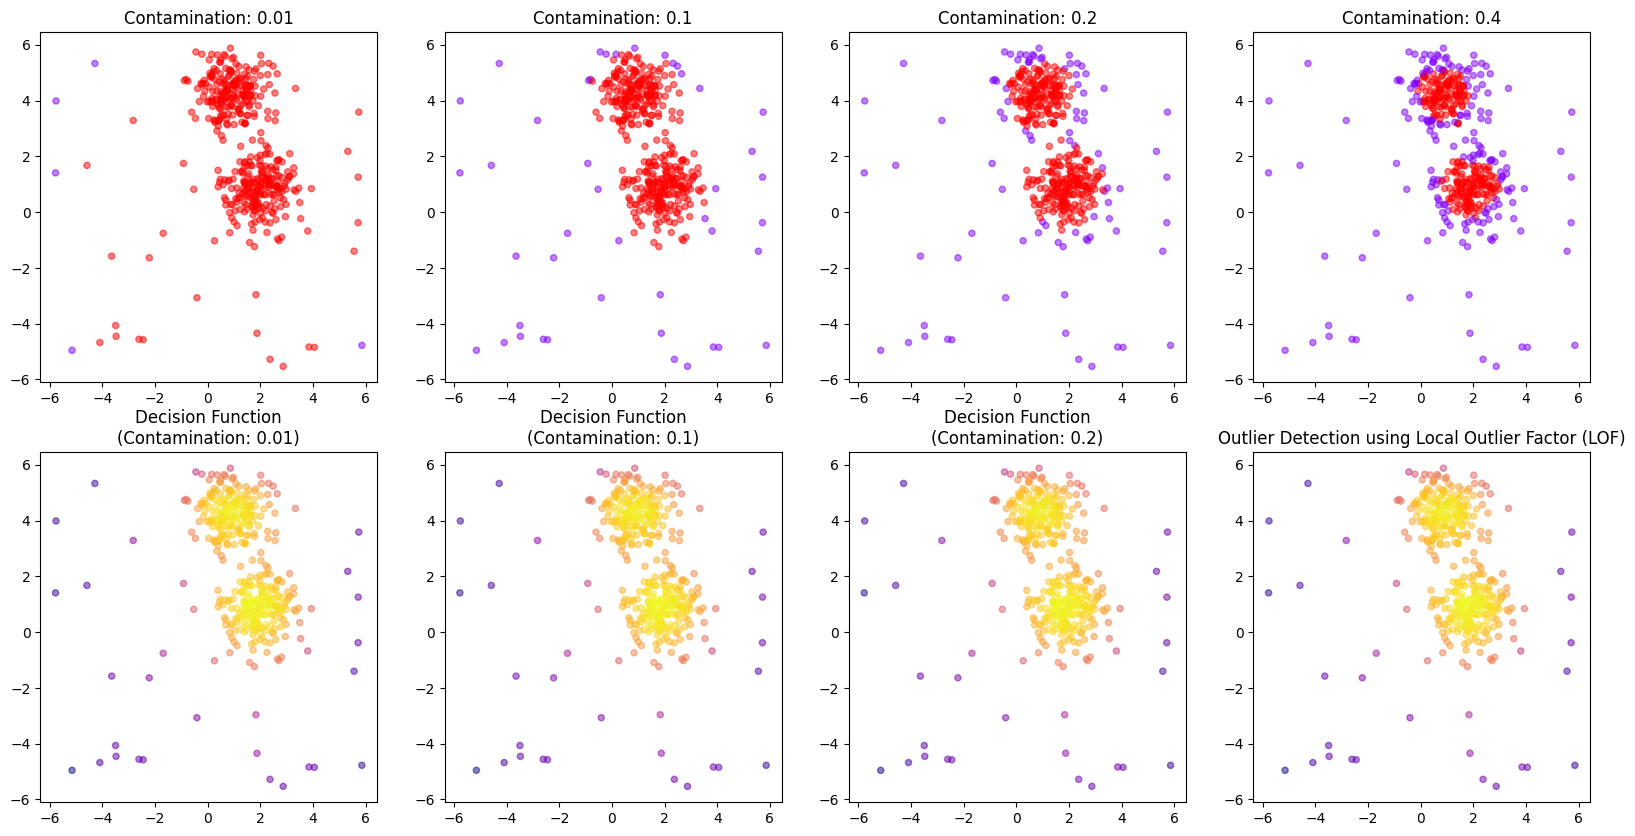

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

for i, contamination in enumerate([0.01, 0.1, 0.2, 0.4]):
    axes[0, i].scatter(
        X[:, 0], X[:, 1],
        c=outlier_classifications[i], cmap="rainbow",
        alpha=0.5,
        s=20)
    axes[0, i].set_title(f"Contamination: {contamination}")

for i, contamination in enumerate([0.01, 0.1, 0.2, 0.4]):
    axes[1, i].scatter(
        X[:, 0], X[:, 1],
        c=anomaly_degrees[i], cmap="plasma",
        alpha=0.5,
        s=20)
    axes[1, i].set_title(f"Decision Function\n(Contamination: {contamination})")

plt.title("Outlier Detection using Local Outlier Factor (LOF)")
plt.show()

## DBSCAN

In [39]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Create the model
dbscan = DBSCAN(eps=0.5, min_samples=5) # Adjust eps and min_samples as needed

# Fit the model
dbscan.fit(X)

# Get the labels
labels = dbscan.labels_

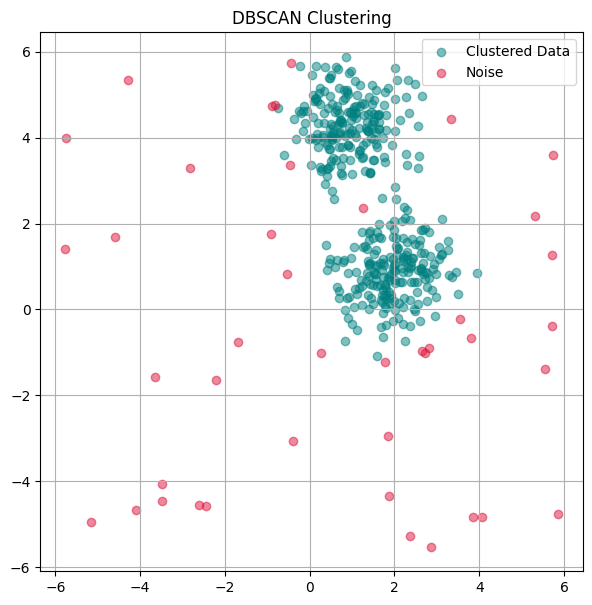

In [44]:
# -1 represents noise/outliers
noise_mask = labels == -1

# Plot the results
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c="teal", alpha=0.5, label='Clustered Data')
ax.scatter(X[noise_mask, 0], X[noise_mask, 1], c='crimson', alpha=0.5, label='Noise')
plt.title("DBSCAN Clustering")
plt.grid(True)
plt.legend()
plt.show()

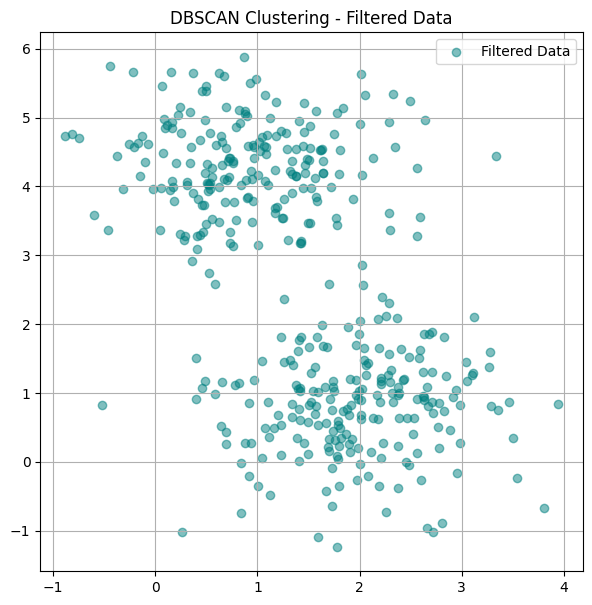

In [54]:
import matplotlib.pyplot as plt
# Remove noisy instances
X_filtered = X[~noise_mask]

# Plot the filtered data
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X_filtered[:, 0], X_filtered[:, 1], c="teal", alpha=0.5, label='Filtered Data')
plt.title("DBSCAN Clustering - Filtered Data")
plt.grid(True)
plt.legend()
plt.show()

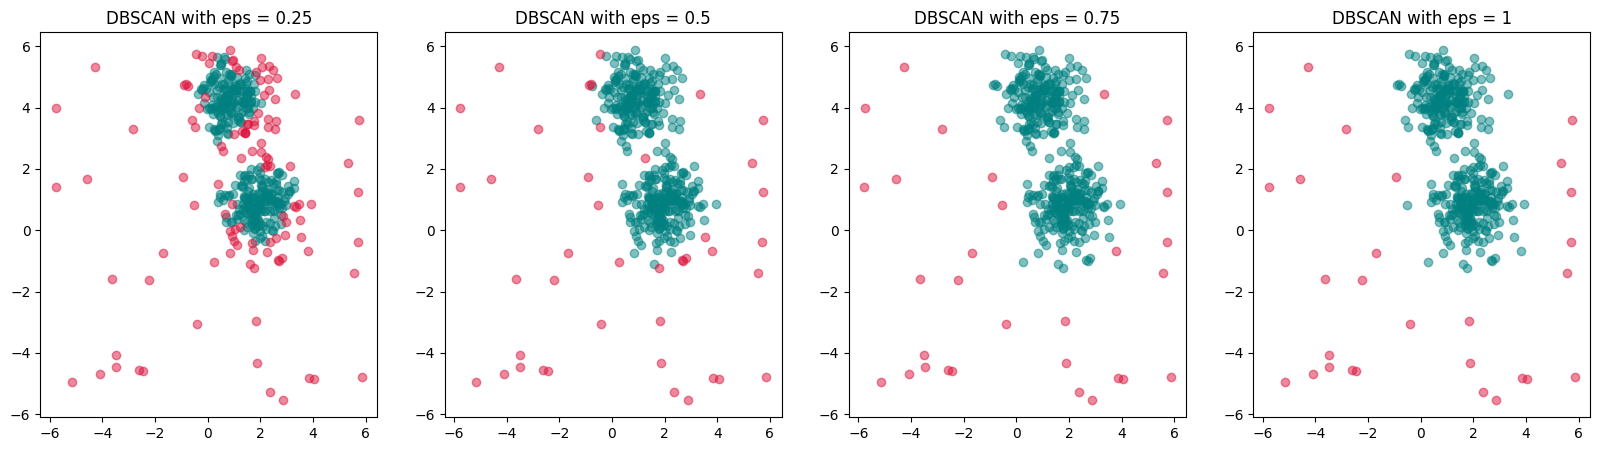

In [52]:
# prompt: Can you run DBSCAN method to detect outlier or noise on the data X using different eps values 0.1, 0.5, an 1 and plot the results

import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

fig, axes = plt.subplots(1, 4, figsize=(20, 5))
eps_values = [0.25, 0.5, 0.75, 1]

for i, eps in enumerate(eps_values):
    # Create the model
    dbscan = DBSCAN(eps=eps, min_samples=5)

    # Fit the model
    dbscan.fit(X)

    # Get the labels
    labels = dbscan.labels_

    # -1 represents noise/outliers
    noise_mask = labels == -1

    # Plot the results
    axes[i].scatter(X[~noise_mask, 0], X[~noise_mask, 1], c="teal", alpha=0.5, label='Clustered Data')
    axes[i].scatter(X[noise_mask, 0], X[noise_mask, 1], c='crimson', alpha=0.5, label='Noise')
    axes[i].set_title(f'DBSCAN with eps = {eps}')

plt.show()
